In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
df=pd.read_csv("Copy.csv")

In [3]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [6]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [7]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [8]:
df["LoanAmount_log"]=np.log(df["LoanAmount"])

<Axes: ylabel='Frequency'>

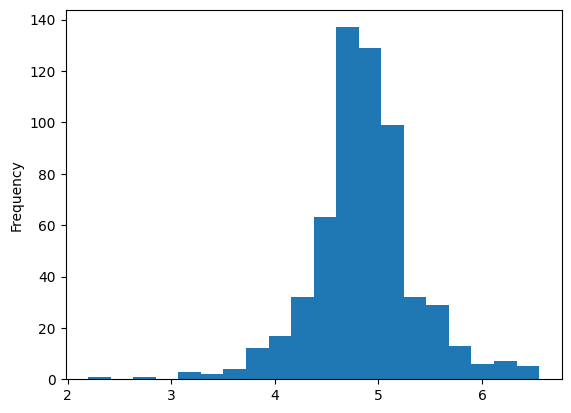

In [13]:
df["LoanAmount_log"].plot(kind="hist",bins=20)

In [12]:
df["LoanAmount_log"].isnull().sum()

22

<Axes: xlabel='Total_income_log', ylabel='Count'>

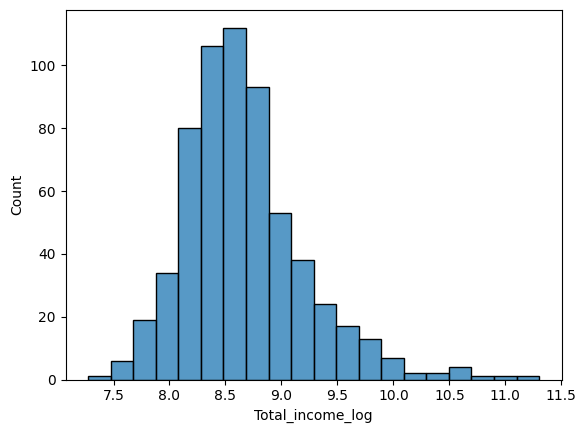

In [20]:
df["Total_income"]=df["ApplicantIncome"]+df["CoapplicantIncome"]
df["Total_income_log"]=np.log(df["Total_income"])
sns.histplot(df["Total_income_log"],bins=20)
                              

#handling missing values.

In [39]:
df["Gender"]=df["Gender"].fillna(df["Gender"].mode()[0])

In [40]:
df["Married"]=df["Married"].fillna(df["Married"].mode()[0])

In [41]:
df["Dependents"]=df["Dependents"].fillna(df["Dependents"].mode()[0])

In [42]:
df["Self_Employed"]=df["Self_Employed"].fillna(df["Self_Employed"].mode()[0])

In [43]:
df["LoanAmount"]=df["LoanAmount"].fillna(df["LoanAmount"].mode()[0])

In [44]:
df["Loan_Amount_Term"]=df["Loan_Amount_Term"].fillna(df["Loan_Amount_Term"].mode()[0])

In [45]:
df["Credit_History"]=df["Credit_History"].fillna(df["Credit_History"].mode()[0])

In [46]:
df["LoanAmount_log"]=df["LoanAmount_log"].fillna(df["LoanAmount_log"].mode()[0])

In [71]:
df.drop("Toatl_income_log",inplace=True,axis=1)

In [72]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,LoanAmount_log,Total_income,Total_income_log
0,LP001002,Male,No,0,Graduate,No,5849,0.0,120.0,360.0,1.0,Urban,Y,4.787492,5849.0,8.674026
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N,4.852030,6091.0,8.714568
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y,4.189655,3000.0,8.006368
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y,4.787492,4941.0,8.505323
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y,4.948760,6000.0,8.699515


In [73]:
#loan according to gender
df_oo=df["Gender"].value_counts().index
df_of=df["Gender"].value_counts().values

([<matplotlib.patches.Wedge at 0x1a3bb561ca0>,
 [Text(-0.924270796186087, 0.596425599146731, 'Male'),
  Text(0.9242707961860869, -0.5964255991467311, 'Female')],
 [Text(-0.5041477070105929, 0.3253230540800351, '81.7590%'),
  Text(0.5041477070105927, -0.32532305408003515, '18.2410%')])

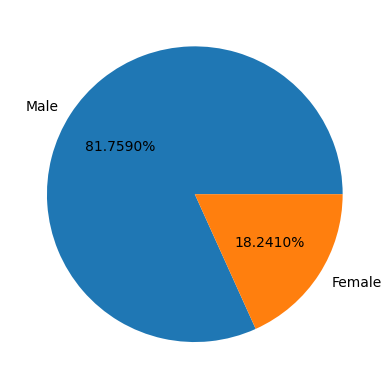

In [74]:
plt.pie(df_of,labels=df_oo,autopct="%1.4f%%")

#loan according to MarriedStatus

In [76]:
df_op=df["Married"].value_counts().index
df_op2=df["Married"].value_counts().values

([<matplotlib.patches.Wedge at 0x1a3bb569940>,
 [Text(-0.5088939778544662, 0.975206090682097, 'Yes'),
  Text(0.5088939778544657, -0.9752060906820972, 'No')],
 [Text(-0.27757853337516336, 0.5319305949175074, '65.309%'),
  Text(0.27757853337516303, -0.5319305949175075, '34.691%')])

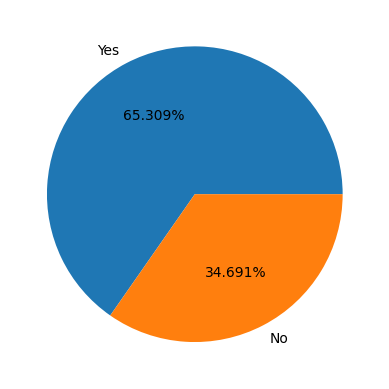

In [77]:
plt.pie(df_op2,labels=df_op,autopct="%1.3f%%")

#loan according to dependents

C:\Users\anshm\AppData\Local\Temp\ipykernel_17724\1643408102.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="Dependents",data=df,palette="Set1")


<Axes: xlabel='Dependents', ylabel='count'>

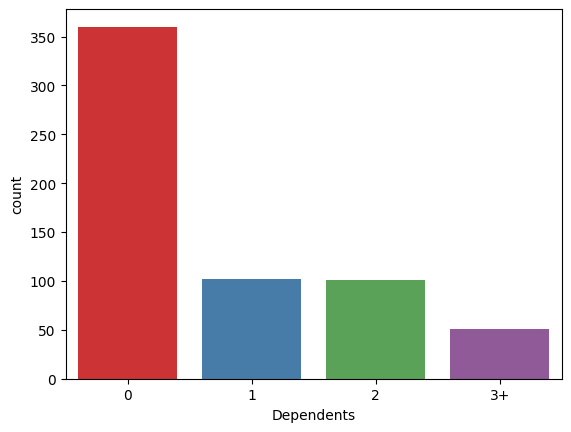

In [85]:
sns.countplot(x="Dependents",data=df,palette="Set1")

#loan on the basis of self_employed people

C:\Users\anshm\AppData\Local\Temp\ipykernel_17724\3862006174.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="Self_Employed",data=df,palette="Set1")


<Axes: xlabel='Self_Employed', ylabel='count'>

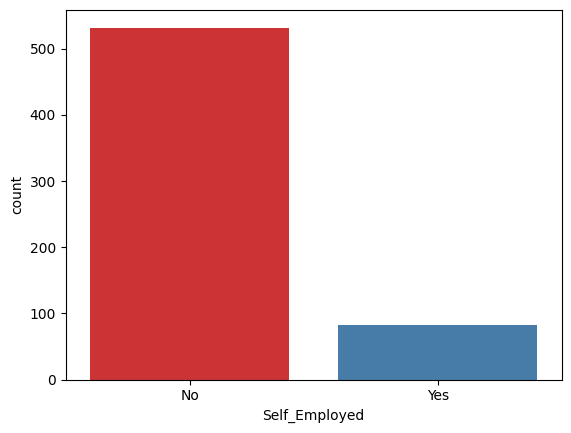

In [86]:
sns.countplot(x="Self_Employed",data=df,palette="Set1")

#loan based on LOAN AMOUNT

In [87]:
df["LoanAmount"].value_counts()

LoanAmount
120.0    42
110.0    17
100.0    15
160.0    12
187.0    12
         ..
240.0     1
214.0     1
59.0      1
166.0     1
253.0     1
Name: count, Length: 203, dtype: int64

C:\Users\anshm\AppData\Local\Temp\ipykernel_17724\565875818.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="LoanAmount",data=df,palette="Set1")


<Axes: xlabel='LoanAmount', ylabel='count'>

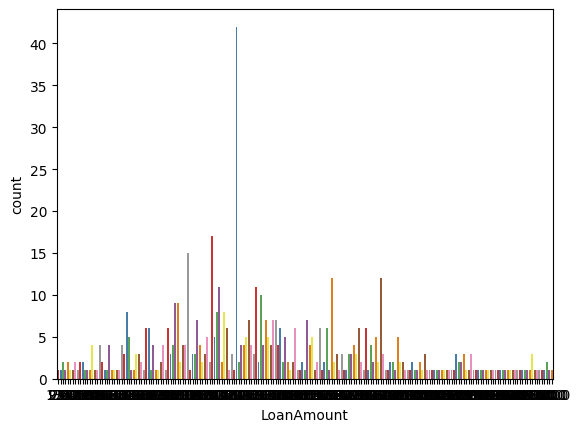

In [88]:
sns.countplot(x="LoanAmount",data=df,palette="Set1")

#loan based on credit history

C:\Users\anshm\AppData\Local\Temp\ipykernel_17724\2969366931.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="Credit_History",data=df,palette="Set1")


<Axes: xlabel='Credit_History', ylabel='count'>

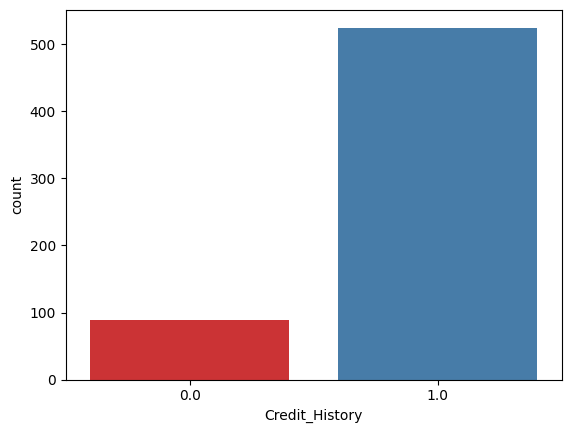

In [93]:
sns.countplot(x="Credit_History",data=df,palette="Set1")

#train and testing the data set

In [105]:
df.head(2)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,LoanAmount_log,Total_income,Total_income_log
0,LP001002,Male,No,0,Graduate,No,5849,0.0,120.0,360.0,1.0,Urban,Y,4.787492,5849.0,8.674026
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N,4.852030,6091.0,8.714568


In [421]:
X=df.iloc[:,np.r_[1:5,9:11,13:15]].values
y=df.iloc[:,9].values

In [422]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=103,test_size=0.6)

In [423]:
from sklearn.preprocessing import LabelEncoder,StandardScaler

In [424]:
Labelencoder_x= LabelEncoder()

In [425]:
for i in range(0,5):
    X_train[:,i]=Labelencoder_x.fit_transform(X_train[:,i])
    X_train[:,7]=Labelencoder_x.fit_transform(X_train[:,7])   
X_train

array([[1, 1, 1, ..., 1.0, 4.852030263919617, 135],
       [1, 1, 2, ..., 1.0, 3.8066624897703196, 47],
       [1, 1, 0, ..., 1.0, 4.248495242049359, 208],
       ...,
       [0, 1, 0, ..., 1.0, 4.727387818712341, 142],
       [1, 1, 2, ..., 1.0, 4.836281906951478, 106],
       [1, 1, 3, ..., 0.0, 4.553876891600541, 85]], dtype=object)

In [426]:
Labelencoder_y=LabelEncoder()

In [427]:
y_train=Labelencoder_y.fit_transform(y_train)
y_train

array([5, 5, 5, 5, 5, 4, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 2, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 1, 5, 5, 3, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 2, 2, 2, 5, 5, 5, 5, 2, 5, 5, 5, 5, 5, 2, 5, 2, 5,
       5, 5, 5, 2, 5, 5, 5, 2, 5, 5, 5, 5, 2, 5, 5, 5, 5, 5, 2, 2, 5, 6,
       5, 5, 2, 5, 5, 5, 0, 5, 2, 5, 2, 5, 5, 5, 3, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 6, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 4, 5, 6, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 2, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 6, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 2, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 2, 5, 5, 5, 6, 5, 5, 5, 5, 2, 5, 5, 5,
       5, 2, 5, 5, 5, 5, 5, 5, 5, 5, 2, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       2, 5, 5, 5, 5, 2, 5, 5, 5, 5, 4, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 2,
       5, 5, 5], dtype=int64)

In [428]:
for i in range(0,5):
    X_test[:,i]=Labelencoder_x.fit_transform(X_test[:,i])
    X_test[:,7]=Labelencoder_x.fit_transform(X_test[:,7])   
X_test

array([[1, 1, 2, ..., 1.0, 4.859812404361672, 192],
       [1, 1, 0, ..., 1.0, 4.912654885736052, 305],
       [0, 0, 0, ..., 0.0, 4.919980925828125, 304],
       ...,
       [0, 0, 1, ..., 1.0, 3.6888794541139363, 317],
       [1, 0, 1, ..., 1.0, 5.247024072160486, 105],
       [1, 0, 0, ..., 1.0, 4.382026634673881, 40]], dtype=object)

In [429]:
y_test=Labelencoder_y.fit_transform(y_train)
y_test

array([5, 5, 5, 5, 5, 4, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 2, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 1, 5, 5, 3, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 2, 2, 2, 5, 5, 5, 5, 2, 5, 5, 5, 5, 5, 2, 5, 2, 5,
       5, 5, 5, 2, 5, 5, 5, 2, 5, 5, 5, 5, 2, 5, 5, 5, 5, 5, 2, 2, 5, 6,
       5, 5, 2, 5, 5, 5, 0, 5, 2, 5, 2, 5, 5, 5, 3, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 6, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 4, 5, 6, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 2, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 6, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 2, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 2, 5, 5, 5, 6, 5, 5, 5, 5, 2, 5, 5, 5,
       5, 2, 5, 5, 5, 5, 5, 5, 5, 5, 2, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       2, 5, 5, 5, 5, 2, 5, 5, 5, 5, 4, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 2,
       5, 5, 5], dtype=int64)

In [430]:
ss=StandardScaler()

In [431]:
X_train=ss.fit_transform(X_train)
X_test=ss.fit_transform(X_test)

In [432]:
from sklearn.tree import DecisionTreeClassifier

In [433]:
dt=DecisionTreeClassifier()

In [434]:
dt.fit(X_train,y_train)

DecisionTreeClassifier()

In [435]:
pre=dt.predict(X_test)
pre

array([5, 5, 5, 5, 5, 5, 4, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 4, 5, 5, 5, 5, 5, 5, 5, 5, 5, 6, 5, 5, 2, 5, 5, 5, 5,
       5, 5, 5, 0, 2, 5, 5, 5, 5, 6, 3, 5, 2, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 4, 5, 5, 6, 2, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 2, 5, 5, 5, 5, 5, 5, 0, 5, 2, 6, 5, 5, 5, 6, 5, 2, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 0, 5, 5, 5, 5, 5, 4, 2, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 2, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 4, 0, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 2,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 2, 5, 5, 5, 6, 5, 5, 5, 5, 5, 5, 5, 2,
       5, 5, 5, 5, 6, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 2, 5, 5, 5, 5, 5, 5, 5, 5, 4, 5, 5, 0, 4, 5, 5, 5, 5, 5, 4, 5,
       2, 2, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 2, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 3, 6, 5, 5, 5,
       5, 5, 5, 5, 5, 4, 5, 5, 5, 5, 5, 5, 5, 5, 0,

In [436]:
from sklearn.metrics import accuracy_score
arr=accuracy_score(y_test,pred)

In [443]:
print("The accuracy is :->",arr)
print("THE ACCURACY IN ACTUAL NUMBERS:->",arr*100)

The accuracy is :-> 0.7755102040816326
THE ACCURACY IN ACTUAL NUMBERS:-> 77.55102040816327
